In [ ]:
!pip install catboost

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

In [ ]:
df = pd.read_csv('winequalityN.csv')
df.sample(3)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2314,white,7.0,0.19,0.33,6.3,0.032,42.0,127.0,0.99182,3.31,0.38,12.2,6
4436,white,6.7,0.28,0.28,4.5,0.051,14.0,92.0,0.99224,3.36,0.58,11.9,6
4115,white,7.3,0.26,0.32,1.2,0.041,29.0,94.0,0.98978,3.07,0.45,12.0,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
df.shape

(6497, 13)

<ipython-input-6-077c59dbb5d5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap= 'viridis', linewidths=2, linecolor='white')


<Axes: >

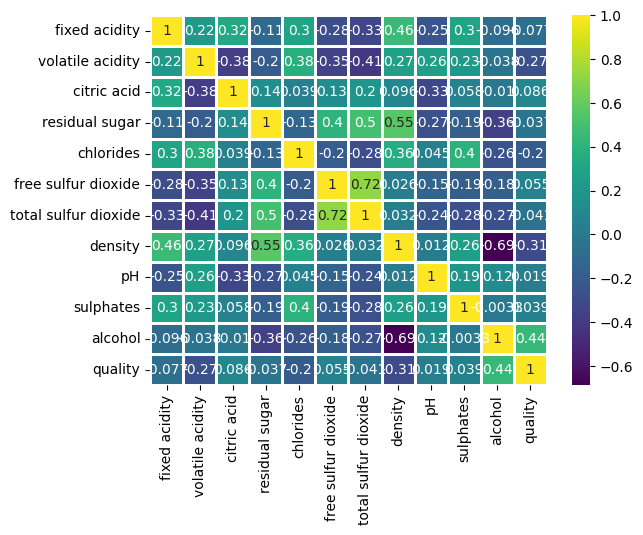

In [ ]:
sns.heatmap(df.corr(), annot = True, cmap= 'viridis', linewidths=2, linecolor='white')

In [ ]:
# df.dropna(inplace=True) # я решила заменить средним значением, а не удалять

In [ ]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [ ]:
df['fixed acidity'].fillna(df['fixed acidity'].mean(), inplace=True)
df['volatile acidity'].fillna(df['volatile acidity'].mean(), inplace=True)
df['citric acid'].fillna(df['citric acid'].mean(), inplace=True)
df['residual sugar'].fillna(df['residual sugar'].mean(), inplace=True)
df['chlorides'].fillna(df['chlorides'].mean(), inplace=True)
df.pH.fillna(df.pH.mean(), inplace=True)
df.sulphates.fillna(df.sulphates.mean(), inplace=True)

In [ ]:
df.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: xlabel='type', ylabel='count'>

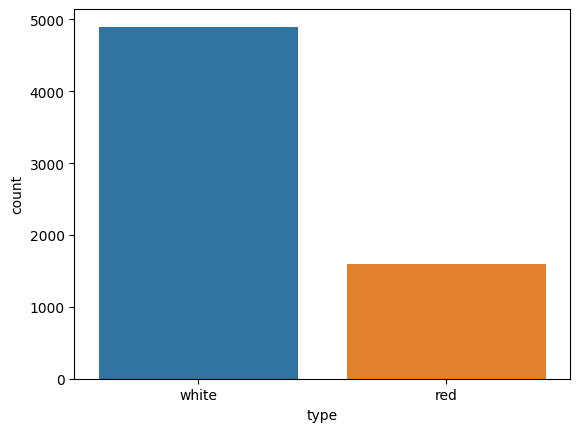

In [ ]:
sns.countplot(x='type', data=df)

In [ ]:
data = pd.get_dummies(df, columns=['type'], prefix= 'red', drop_first= True)
data.sample(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_white
1045,7.3,0.15,0.40,2.00,0.050,24.0,92.0,0.9932,3.14,0.45,10.5,5,1
539,6.8,0.25,0.24,4.55,0.053,41.0,211.0,0.9955,3.37,0.67,9.5,6,1
2165,7.0,0.35,0.31,1.80,0.069,15.0,162.0,0.9944,3.18,0.47,9.4,5,1


<Axes: >

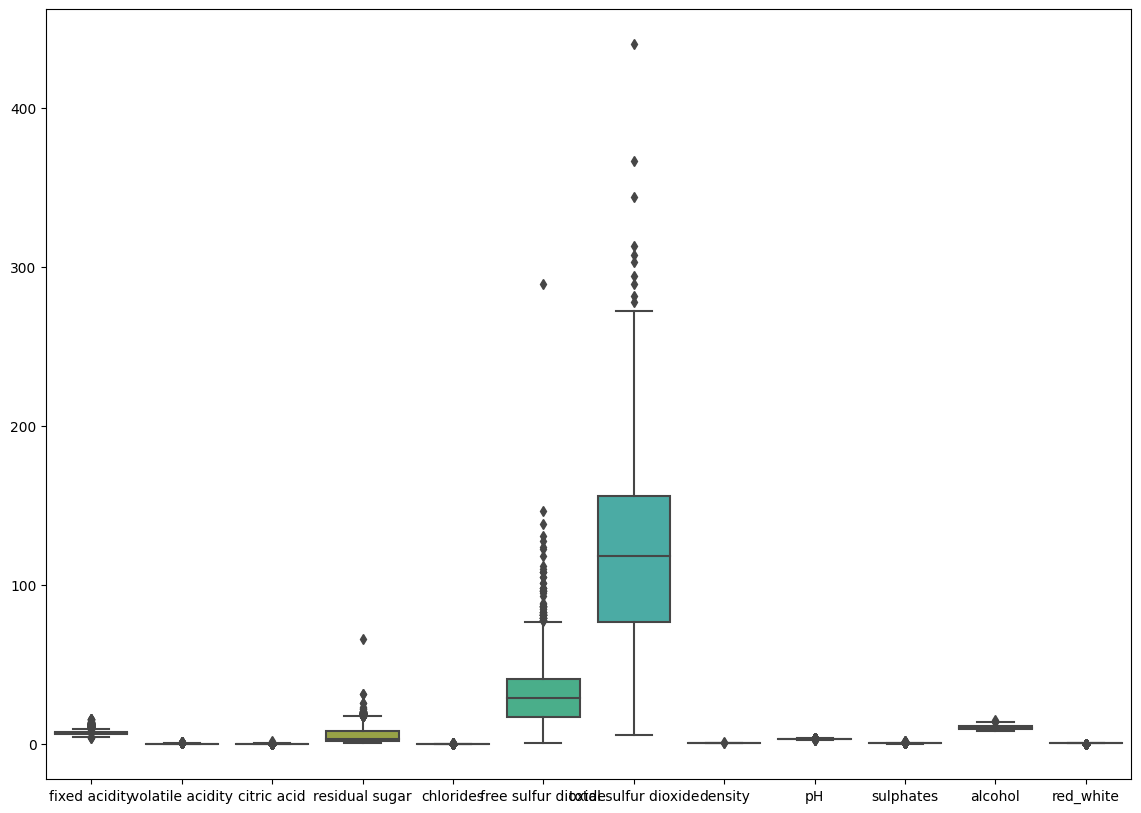

In [ ]:
plt.figure(figsize=(14, 10))
sns.boxplot(data)

<Axes: >

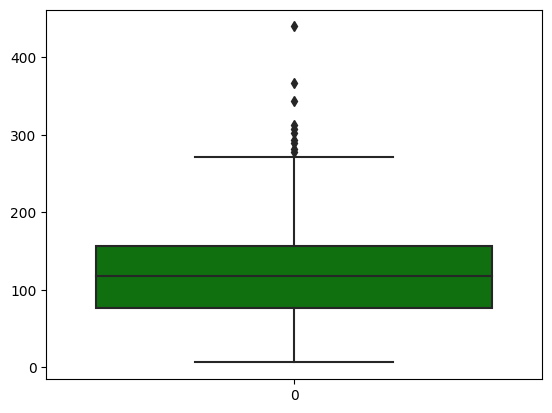

In [ ]:
sns.boxplot(data['total sulfur dioxide'], color='green')

In [ ]:
data = data[(data['total sulfur dioxide'] < 270)]

<Axes: >

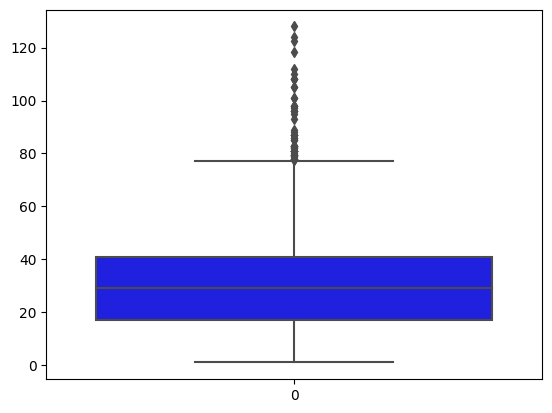

In [ ]:
sns.boxplot(data['free sulfur dioxide'], color='blue')

In [ ]:
data = data[(data['free sulfur dioxide'] < 77)]

<Axes: >

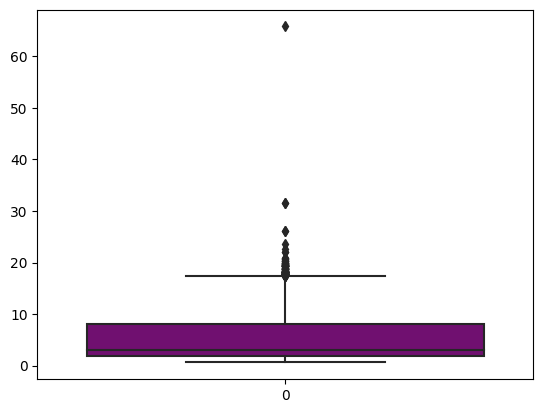

In [ ]:
sns.boxplot(data['residual sugar'], color='purple')

In [ ]:
data = data[(data['residual sugar'] < 18)]

In [ ]:
round(data.duplicated().mean(), 2) # большой % дубликатов и потому не уверена, что с ними делать: удалять или нет

0.18

In [ ]:
y = data['quality']
y

1       6
2       6
3       6
4       6
5       6
       ..
6492    5
6493    6
6494    6
6495    5
6496    6
Name: quality, Length: 6337, dtype: int64

In [ ]:
y.value_counts(normalize=True)

6    0.437747
5    0.325548
7    0.168534
4    0.033770
8    0.029667
3    0.003945
9    0.000789
Name: quality, dtype: float64

In [ ]:
data = data.drop(columns=['quality'])
data.sample(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,red_white
2853,5.3,0.16,0.39,1.0,0.028,40.0,101.0,0.99156,3.57,0.59,10.6,1
1677,7.3,0.23,0.37,1.8,0.032,60.0,156.0,0.99200,3.11,0.35,11.1,1
3061,6.2,0.25,0.54,7.0,0.046,58.0,176.0,0.99454,3.19,0.70,10.4,1


In [ ]:
data.shape, y.shape

((6337, 12), (6337,))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size= 0.2, random_state=7)

In [ ]:
tree = DecisionTreeClassifier(random_state = 7)
tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=7)

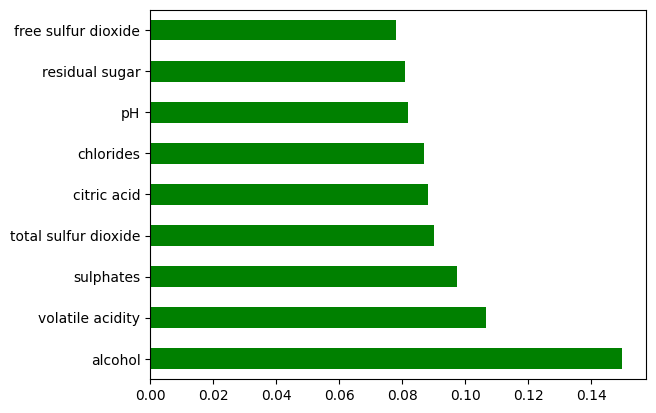

In [ ]:
feat_importance = pd.Series(tree.feature_importances_, index = x_train.columns)
feat_importance.nlargest(9).plot(kind="barh", color='green')
plt.show() # heatmap также показывает, что корреляция с alcohol сильнее остальных

In [ ]:
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=10000))
model.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=10000))])

In [ ]:
print(model.score(x_train, y_train), model.score(x_test, y_test)) # логистическая регрессия не очень подходит для этой классификации

0.5478398106135333 0.5425867507886435


In [ ]:
pred = model.predict(x_test) 

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           3       1.00      0.12      0.22         8
           4       0.40      0.06      0.10        35
           5       0.62      0.60      0.61       423
           6       0.50      0.71      0.59       534
           7       0.57      0.23      0.33       235
           8       0.00      0.00      0.00        32
           9       0.00      0.00      0.00         1

    accuracy                           0.54      1268
   macro avg       0.44      0.25      0.26      1268
weighted avg       0.54      0.54      0.51      1268



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model_2 = make_pipeline(StandardScaler(), CatBoostClassifier(random_state=7))
model_2.fit(x_train, y_train)

In [ ]:
print(model_2.score(x_train, y_train), model_2.score(x_test, y_test)) # видимо, модель переобучилась

0.9406194515683567 0.6482649842271293


In [ ]:
pred_2 = model_2.predict(x_test) 

In [ ]:
print(classification_report(y_test, pred_2))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.35      0.17      0.23        35
           5       0.69      0.69      0.69       423
           6       0.61      0.75      0.67       534
           7       0.70      0.50      0.58       235
           8       0.82      0.28      0.42        32
           9       0.00      0.00      0.00         1

    accuracy                           0.65      1268
   macro avg       0.45      0.34      0.37      1268
weighted avg       0.65      0.65      0.64      1268



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
